<a href="https://colab.research.google.com/github/ashamril/Text-Analytics/blob/master/Background_disease_of_the_deceased_covid19_patients_in_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Background disease of the deceased covid19 patients in Malaysia**<br>
**Latar belakang penyakit pesakit covid19 yang meninggal di Malaysia**

In [53]:
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import requests
import calendar
import re
from collections import Counter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict  
from pandas import DataFrame
import plotly.express as px

**Data collection**

In [54]:
# # For testing 
# URL = f"https://kpkesihatan.com/2021/2/1/kenyataan-akhbar-kpk-1-februari-2021-situasi-semasa-jangkitan-penyakit-coronavirus-2019-covid-19-di-malaysia/"
# latarBelakang = []

# response = requests.get(URL)
# if response.status_code == 200:
#   html_text = response.text

# soup = BeautifulSoup(html_text)
# tables = soup.findAll('table')

# selected_table = ''

# for table in tables:
#   rows = table.findAll('tr')
#   for row in rows:
#     columns = row.findAll('td')
#     for column in columns:
#       if "Latar Belakang" in column.text:
#         selected_table = table  
          
# for row in selected_table('tr')[1:]:
#   cell = row.find_all('td')[6].getText(strip=True)
#   latarBelakang.append(cell)
# print(latarBelakang)
# type(point)

In [55]:
def collectLatarBelakang(day, month, mth, year):
  URL = f"https://kpkesihatan.com/{year}/{month}/{day}/kenyataan-akhbar-kpk-{day}-{mth}-{year}-situasi-semasa-jangkitan-penyakit-coronavirus-2019-covid-19-di-malaysia"
  
  response = requests.get(URL)
  if response.status_code == 200:
    html_text = response.text
    soup = BeautifulSoup(html_text)
    tables = soup.findAll('table')

    selected_table = ''
    for table in tables:
      rows = table.findAll('tr')
      for row in rows:
        columns = row.findAll('td')
        for column in columns:
          if "Latar Belakang" in column.text:
            selected_table = table  
            for row in selected_table('tr')[1:]:
              cell = row.find_all('td')[6].getText(strip=True)
              latarBelakang.append(cell)
    #print(type(selected_table))
  else:
    print("{} {} {} Link 404! {}".format(day, mth, year, URL))

In [56]:
# # Data collection for respective month & year
# # Please enter respective month & year below:
# month = 12
# year = 2020
# mth = months_name[month]
# endMonth = calendar.monthrange(year, month)[1]

# # # today's day & month & year
# yearNow = datetime.now().year
# monthNow = datetime.now().month
# dayNow = datetime.now().day
# months_name = {
#   1: "januari",
#   2: "februari",
#   3: "mac",
#   4: "april",
#   5: "mei",
#   6: "jun",
#   7: "julai",
#   8: "ogos",
#   9: "september",
#   10: "oktober",
#   11: "november",
#   12: "disember"}

# latarBelakang = []
# if month == monthNow and year == yearNow:
#   endMonth = dayNow

# for i in range(1, endMonth+1):
#   day = i
#   collectLatarBelakang(day, month, str(mth), year)

In [57]:
# Data collection for last 3 months (Dec 2020, Jan & Feb 2021)

latarBelakang = []
for i in range(1, 31):
  day = i
  month = 12
  year = 2020
  mth = "disember"
  collectLatarBelakang(day, month, str(mth), year)

for i in range(1, 31):
  day = i
  month = 1
  year = 2021
  mth = "januari"
  collectLatarBelakang(day, month, str(mth), year)

for i in range(1, 28):
  day = i
  month = 2
  year = 2021
  mth = "februari"
  collectLatarBelakang(day, month, str(mth), year)

10 disember 2020 Link 404! https://kpkesihatan.com/2020/12/10/kenyataan-akhbar-kpk-10-disember-2020-situasi-semasa-jangkitan-penyakit-coronavirus-2019-covid-19-di-malaysia


**Data preparation/cleaning**

In [58]:
latarBelakang = [x.lower() for x in latarBelakang]
replaceString = [w.replace("dan", ",") for w in latarBelakang]
replaceString = [w.replace(" dan ", ",") for w in replaceString]
replaceString = [w.replace(" dan", ",") for w in replaceString]
replaceString = [w.replace("dan ", ",") for w in replaceString]
replaceString = [w.replace(", dan ", ",") for w in replaceString]
replaceString = [w.replace("dan ,", ",") for w in replaceString]
replaceString = [w.replace(", " ,",") for w in replaceString]
replaceString = [w.replace(" ," ,",") for w in replaceString]
replaceString = [w.replace("–" ,"tiada latar belakang") for w in replaceString]
replaceString = [w.replace("tiggi" ,"tinggi") for w in replaceString]
replaceString = [w.replace(u'\xa0', u' ') for w in replaceString]

stopwords = ["Penyakit", " Penyakit", "Penyakit ", "penyakit", " penyakit", "penyakit ", "Penyakti", " Penyakti", "Penyakti ", "penyakti", " penyakti", "penyakti "]
penyakit = [(lambda x: re.sub(r'|'.join(stopwords), '', x))(x) for x in replaceString]
cleanPenyakit = [element for item in penyakit for element in item.split(',')]

cleanPenyakit = map(str.strip, cleanPenyakit)
cleanPenyakit = list(filter(None, cleanPenyakit))

print(cleanPenyakit)

['kencing manis', 'darah tinggi', 'kanser usus', 'darah tinggi', 'kencing manis', 'jantung', 'tiada latar belakang', 'kencing manis', 'darah tinggi', 'asma', 'darah tinggi', 'dislipidemia', 'obesiti', 'darah tinggi', 'dislipidemia', 'gout', 'tiada latar belakang', 'kencing manis', 'darah tinggi', 'kencing manis', 'jantung', 'darah tinggi', 'buah pinggang kronik', 'kencing manis', 'darah tinggi', 'gout', 'darah tinggi', 'demensia', 'darah tinggi', 'asma', 'dislipidemia', 'strok', 'darah tinggi', 'kencing manis', 'strok', 'kemurungan', 'kencing manis', 'obesiti', 'kencing manis', 'darah tinggi', 'darah tinggi', 'asma', 'kencing manis', 'darah tinggi', 'strok', 'kencing manis', 'darah tinggi', 'darah tinggi', 'buah pinggang kronik', 'darah tinggi', 'dislipidemia', 'obesiti', 'darah tinggi', 'anemia', 'kencing manis', 'darah tinggi', 'darah tinggi', 'hernia', 'anemia', 'osteoartritis', 'kencing manis', 'darah tinggi', 'buah pinggang kronik', 'tiada latar belakang', 'gout', 'darah tinggi', 

**Word cloud**

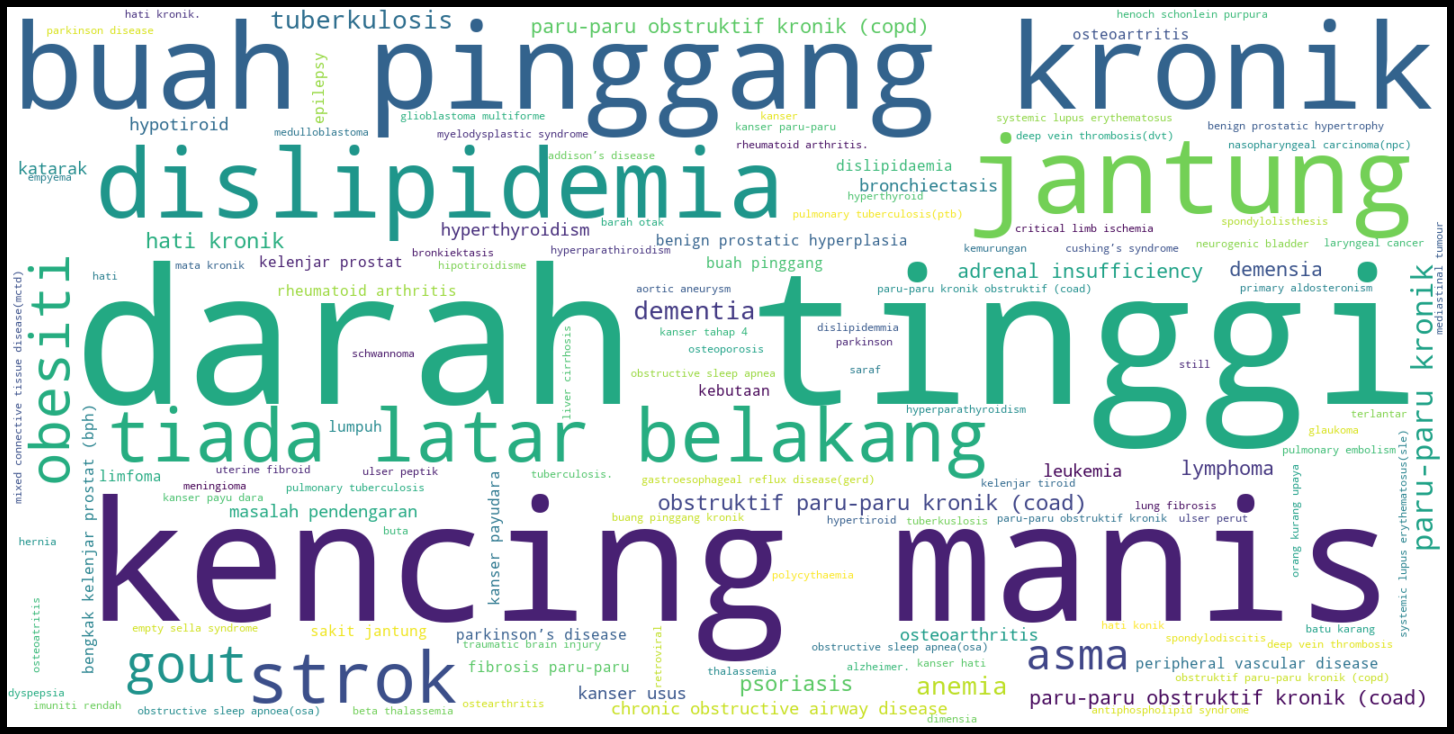

In [59]:
word_could_dict=Counter(cleanPenyakit)
wordcloud = WordCloud(width=1600, height=800, background_color ='white').generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20, 20), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
plt.show()

In [60]:
# # Use map as backkground
# from PIL import Image
# import numpy as np 
# my_mask = np.array(Image.open("malaysia.jpg"))
# word_could_dict=Counter(cleanPenyakit)
# wordcloud = WordCloud(width=1600, height=800, background_color ='white', mask=my_mask, contour_color="steelblue", contour_width=1).generate_from_frequencies(word_could_dict)

# plt.figure(figsize=(20, 20), facecolor='k')
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.tight_layout(pad=0)
# #plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')
# plt.show()

**Data analysis**

In [61]:
def group_list(lst):      
    res =  [(el, lst.count(el)) for el in lst] 
    return list(OrderedDict(res).items()) 

In [62]:
lst = cleanPenyakit
countPenyakit = group_list(lst)
#print(countPenyakit) 

In [63]:
df = DataFrame (countPenyakit,columns=['Diseases','Count'])
df = df.sort_values(by=['Count'], ascending=False)
print(df.head(10))

                Diseases  Count
1           darah tinggi    486
0          kencing manis    380
9   buah pinggang kronik    191
3                jantung    153
6           dislipidemia    124
4   tiada latar belakang     85
11                 strok     81
7                obesiti     45
8                   gout     39
5                   asma     26


In [64]:
# df.plot(x ='Penyakit', y='Count', kind = 'bar', figsize=(30, 10))
# plt.title("Malaysia Covid-19 Kematian {} {} - Latar Belakang Pesakit (Penyakit)".format(mth, year), fontweight='bold', fontsize=15)
# plt.grid(True)
# plt.legend(loc=2)
# plt.show()

In [69]:
d = df.sort_values('Count', ascending= False)
px.bar(
  d.head(10),
  x = "Diseases",
  y = "Count",
  #title= "Malaysia Covid-19 Kematian {} {} - Top 10 Latar Belakang Pesakit (Penyakit)".format(mth, year),
  title="Top 10 diseases of the deceased covid19 patients in Malaysia for Dec 2020, Jan & Feb 2021",
  color_discrete_sequence=["red"],
  height=900,
  #width=800
)

In [70]:
d = df.sort_values('Count', ascending= False)
px.bar(
  d,
  x = "Diseases",
  y = "Count",
  #title= "Malaysia Covid-19 Kematian {} {} - Latar Belakang Pesakit (Penyakit)".format(mth, year),
  title= "Background diseases of the deceased covid19 patients in Malaysia for Dec 2020, Jan & Feb 2021",
  color_discrete_sequence=["red"],
  height=900,
  #width=800
)